# NIST Special Database 19

Special Database 19 contains NIST's entire corpus of training materials for handprinted document and character recognition [link](https://www.nist.gov/srd/nist-special-database-19). 

---

Struct of directories: by_class.zip
https://s3.amazonaws.com/nist-srd/SD19/sd19_users_guide_edition_2.pdf

Number of images:  62


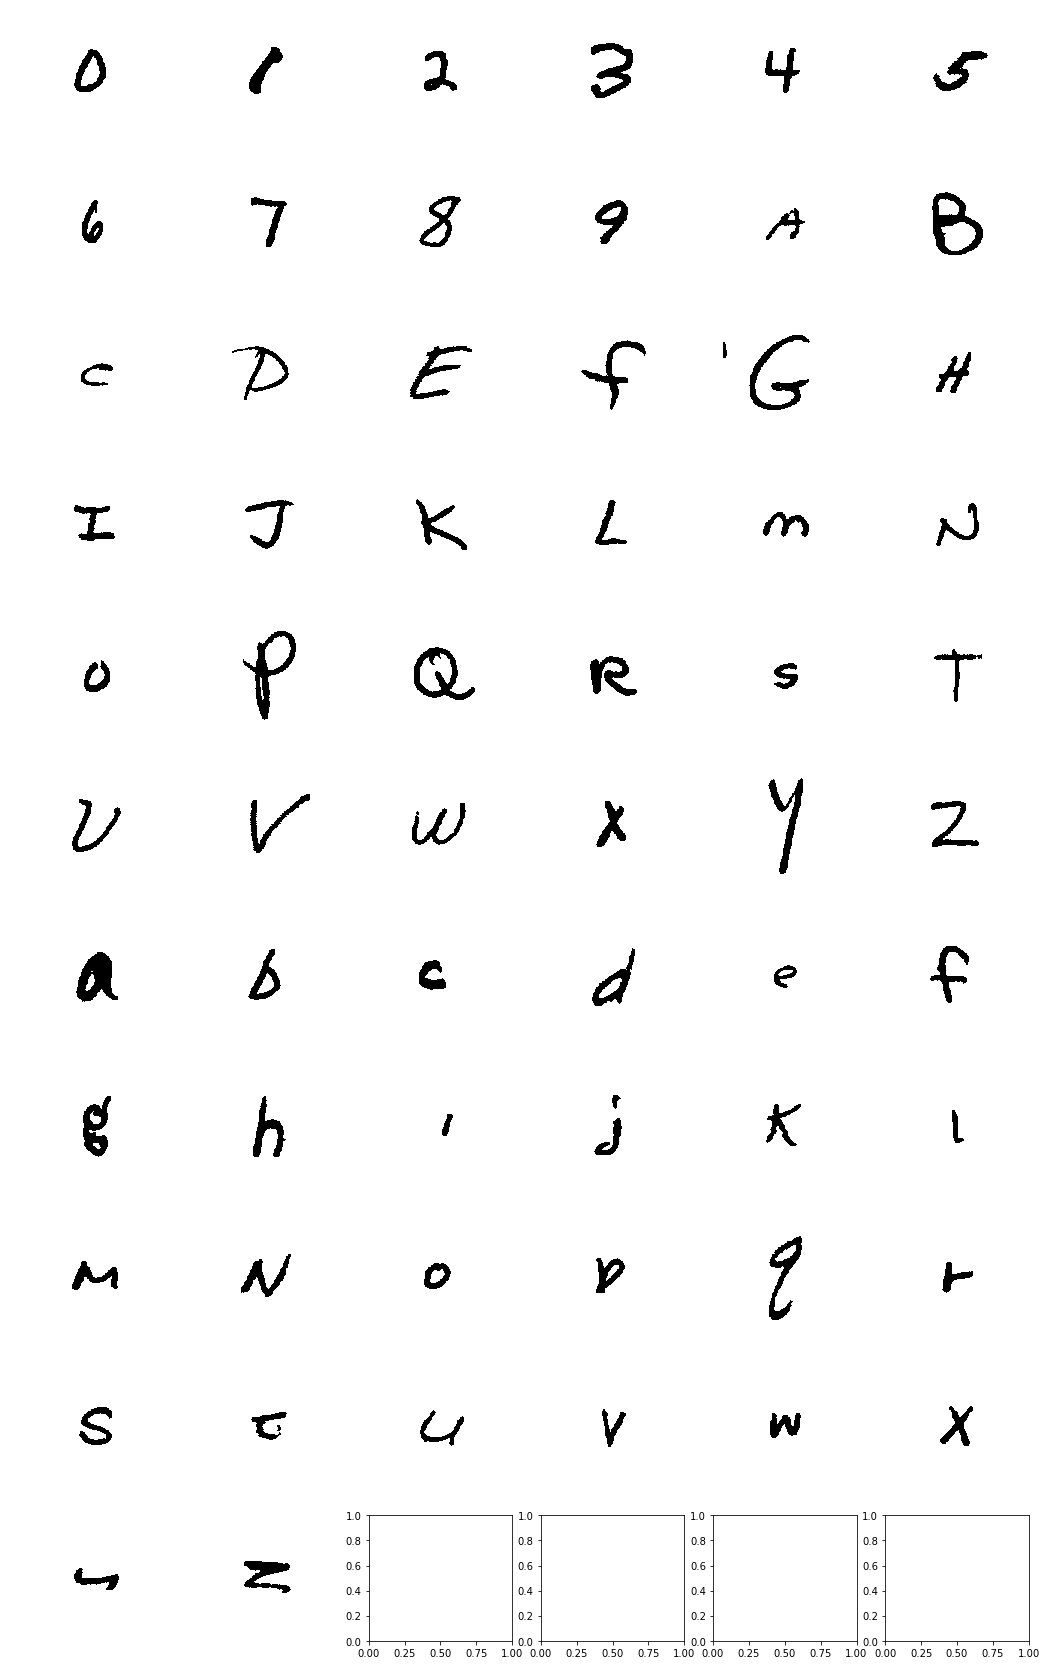

In [68]:
import skimage.io as skio
from os import listdir
from os.path import isdir
from matplotlib import pyplot as plt
import math
import numpy as np

def load_data():
    data = []
    cent = False;
    classes = sorted(listdir("by_class/"))
    for char in classes:
        dirs = listdir("by_class/" + char)
        images = []
        for directory in dirs:
            path = "by_class/" + char + "/" + directory
            if isdir(path):
                for img in listdir(path):
                    if img.endswith(".png"):
                        images.append(path + "/" + img);
                        cent = True;
                        break;
            if(cent):
                cent = False;
                break;
        data.append(images)
    print("Number of images: ",len(data))
    return data

def visualize(data):
    fig_size = [18,30]
    plt.rcParams["figure.figsize"] = fig_size
    x = 6;
    y = math.ceil(len(data)/x);
    fig, axes = plt.subplots(y,x)
    k = i = j = 0
    for char in data:        
        axes[i,j].axis('off')
        axes[i,j].imshow(skio.imread(char[0]))        
        k = k + 1        
        i = math.floor(k/x)
        j = k%x
    plt.show()

dataset = load_data()
visualize(dataset)